<a href="https://colab.research.google.com/github/GiaLan1210/AI_HOMEWORK/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator
from scipy.stats import chi2_contingency
import plotly.offline as pyo
from imblearn.over_sampling import SMOTE
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, pair_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sn
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

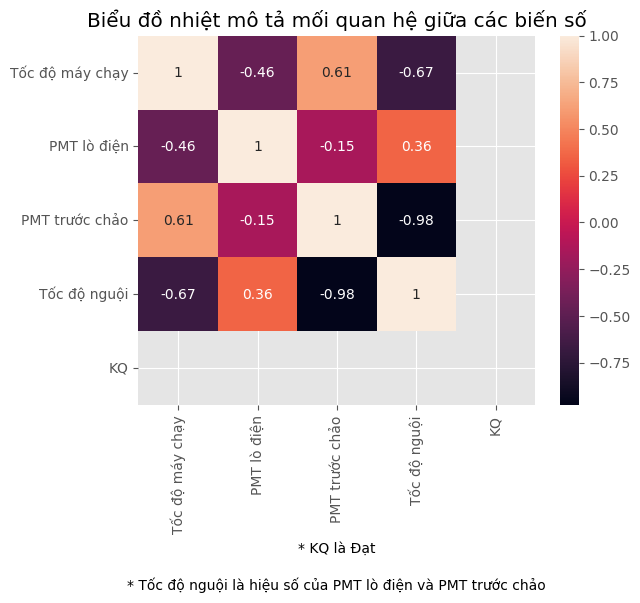

In [3]:
number = ["Tech Speed","PMT Soaking","PMT Snout","KQ"]
df['Tốc độ nguội'] = df['PMT Soaking'] - df['PMT Snout']
number = ["Tech Speed","PMT Soaking","PMT Snout",'Tốc độ nguội',"KQ"]
df = df[number]

df['KQ'] = df['KQ'].map({'KĐ': 0, 'Đ': 1})
df = df.rename(columns={'Tech Speed': 'Tốc độ máy chạy',
                        'PMT Soaking': 'PMT lò điện',
                        'PMT Snout': 'PMT trước chảo'})
# Print the first 5 rows of the dataframe
corr_matrix = df.corr()
#print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.title('Biểu đồ nhiệt mô tả mối quan hệ giữa các biến số')
plt.text(0.5, -0.5, '* Tốc độ nguội là hiệu số của PMT lò điện và PMT trước chảo', ha='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.4, '* KQ là Đạt', ha='center', transform=plt.gca().transAxes)
plt.show()

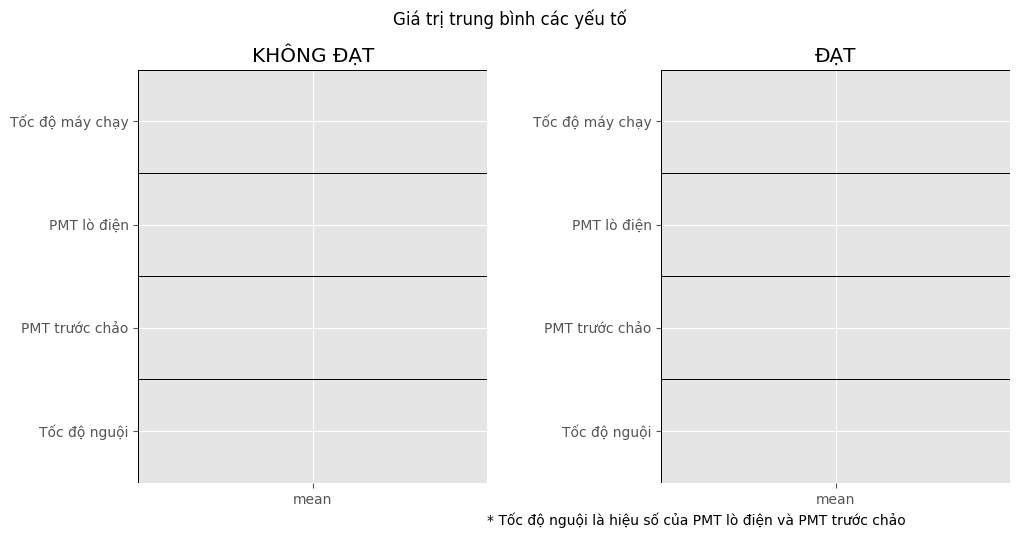

In [4]:

D = df[df['KQ'] == 1].drop(['KQ'],axis=1).describe().T
no_D = df[df['KQ'] == 0].drop(['KQ'],axis=1).describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(no_D[['mean']], annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('KHÔNG ĐẠT')

plt.subplot(1, 2, 2)
sns.heatmap(D[['mean']], annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ĐẠT')
plt.suptitle('Giá trị trung bình các yếu tố', y=1.03)
plt.text(0.1, -0.1, '* Tốc độ nguội là hiệu số của PMT lò điện và PMT trước chảo', ha='center', transform=plt.gca().transAxes)
fig.tight_layout(pad=0)

In [5]:
def num_histplot(col, bins):
    fig = plt.figure(figsize=(15, 7))
    gs = fig.add_gridspec(2, 2, hspace=0.3)
    ax1 = fig.add_subplot(gs[1, 0])
    sns.histplot(data=df[df['KQ'] == 0], x=col, kde=True, ax=ax1, color='#4287f5', label='KHÔNG ĐẠT')  # Màu xanh dương
    ax1.set_title(f'Phân bố {col} của sản phẩm không đạt', color='#4287f5')
    ax2 = fig.add_subplot(gs[1, 1])
    sns.histplot(data=df[df['KQ'] == 1], x=col, kde=True, ax=ax2, color='#ff8838', label='ĐẠT')  # Màu cam
    ax2.set_title(f'Phân bố {col} của sản phẩm đạt', color='#ff8838')
    ax0 = fig.add_subplot(gs[0, :])
    sns.histplot(data=df, x=col, kde=True, ax=ax0, color='#6ddbbd', label='All Data', bins=bins)  # Màu xanh lá cây
    ax0.set_title(f'Phân bố {col} trong khoảng dày BMT 1.4 -1.6', color='#6ddbbd')
    #plt.suptitle(f'Phân bố {col} ĐÁNH GIÁ', fontsize=16, color='black')
    plt.show()

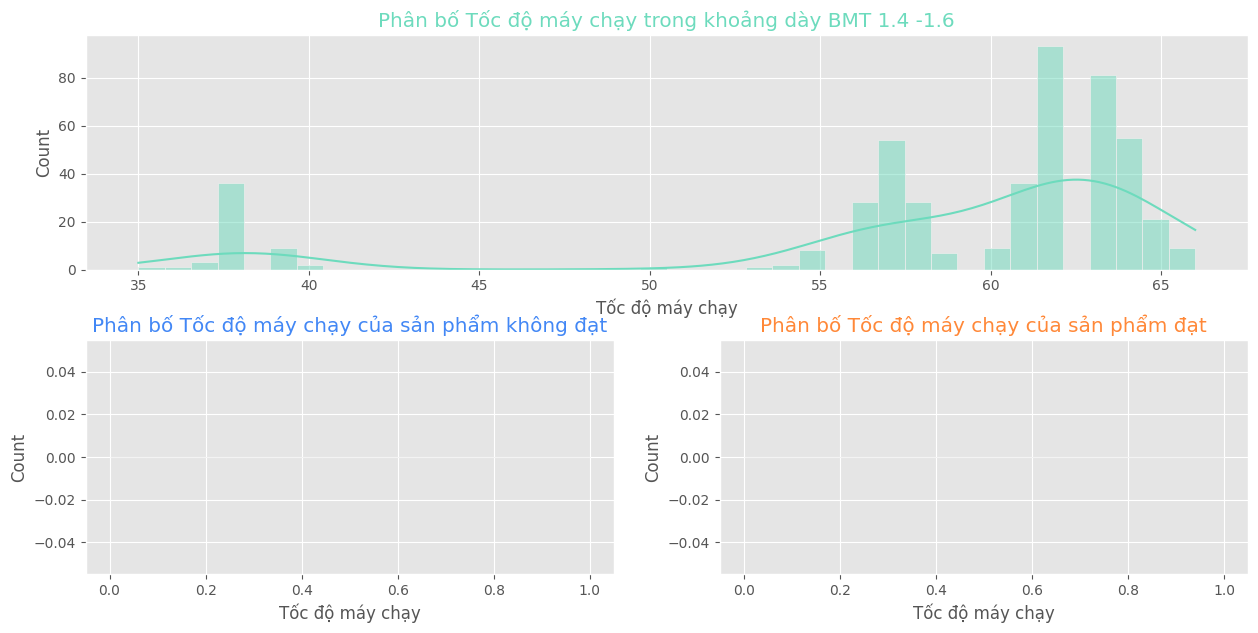

In [6]:
num_histplot('Tốc độ máy chạy',40)

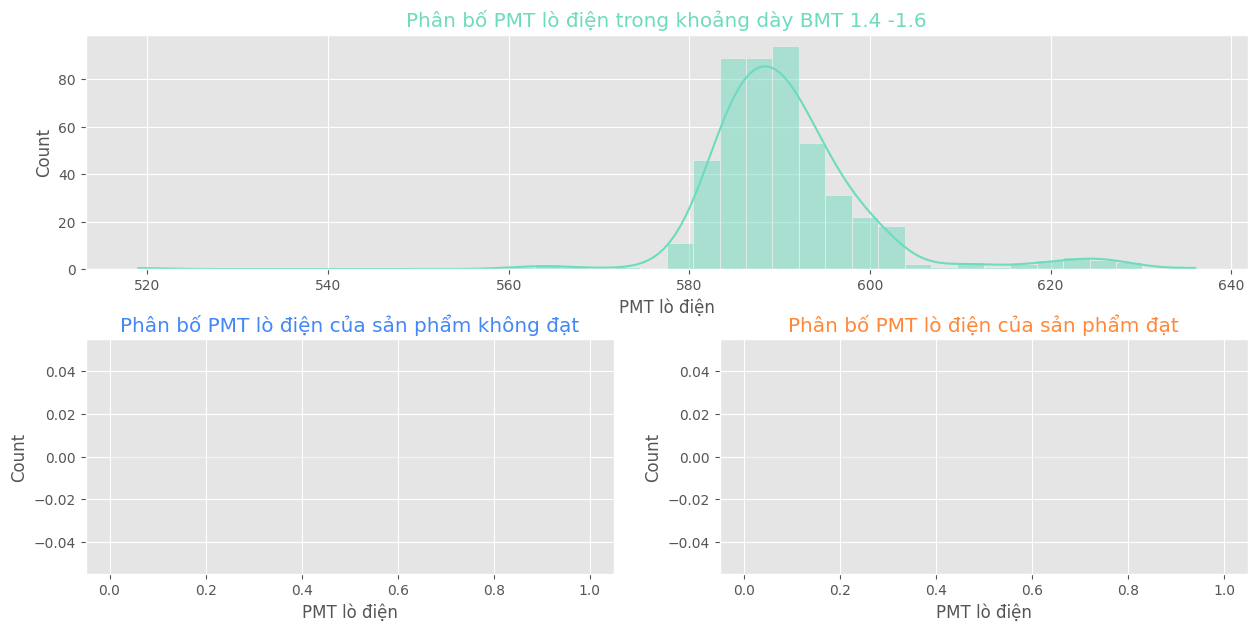

In [7]:
num_histplot("PMT lò điện",40)

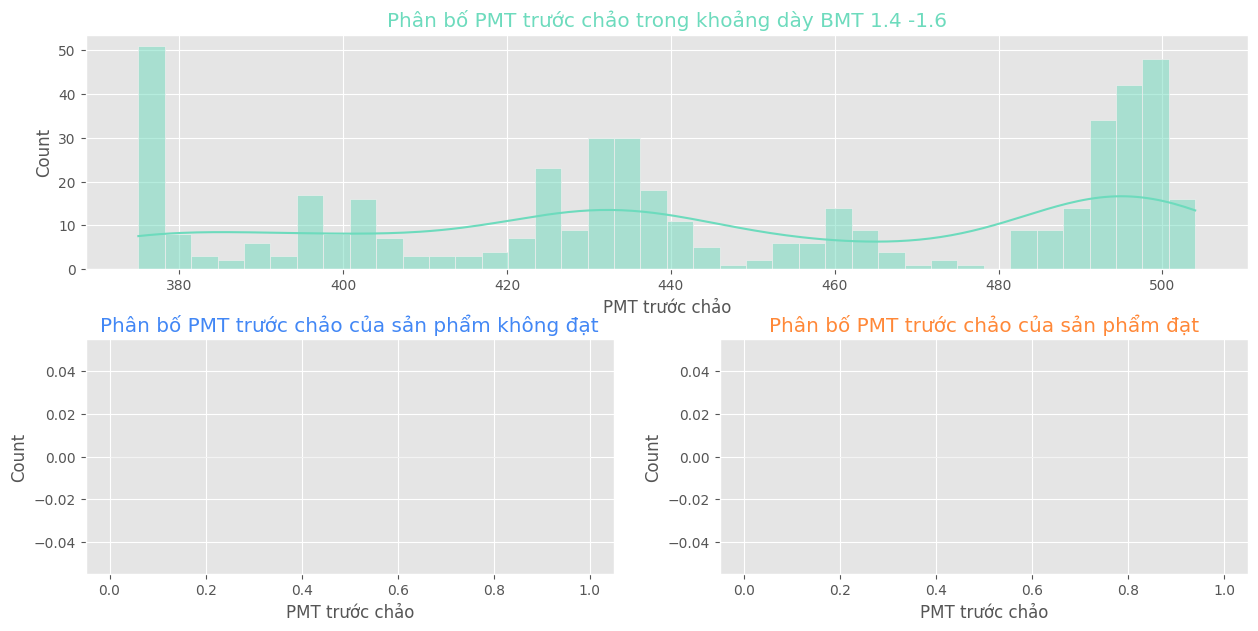

In [8]:
num_histplot("PMT trước chảo",40)

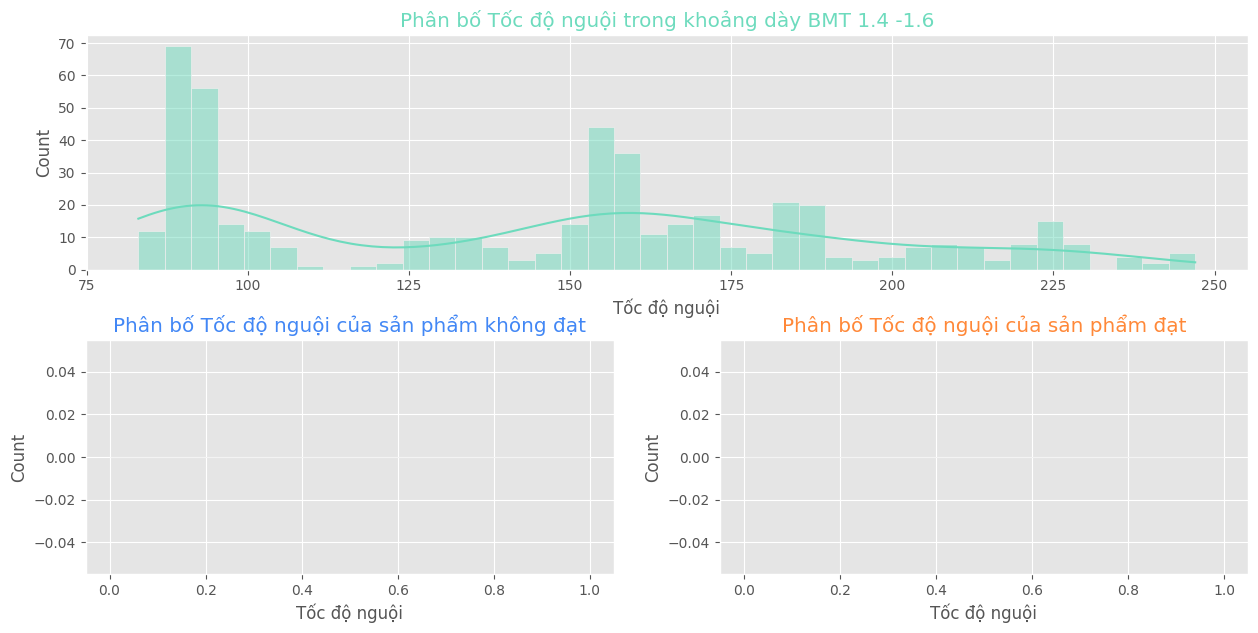

In [9]:
num_histplot('Tốc độ nguội',40)

In [10]:
def num_boxplot(col):
    fig = plt.figure(figsize=(20, 7))
    gs = fig.add_gridspec(2, 2, hspace=0.3)
    ax1 = fig.add_subplot(gs[1, 0])
    sns.boxplot(data=df[df['KQ'] == 0], x=col, ax=ax1, color='#4287f5')  # Màu xanh dương
    ax1.set_title(f'Boxplot of {col} for KHÔNG ĐẠT', color='#4287f5')
    for patch, value in zip(ax1.artists, ax1.get_children()[::6]):
        height = patch.get_height()
        ax1.text(patch.get_x() + patch.get_width() / 2, height, f'{value.get_text()}', ha='center', va='bottom', fontsize=8)

    ax2 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df[df['KQ'] == 1], x=col, ax=ax2, color='#ff8838')  # Màu cam
    ax2.set_title(f'Boxplot of {col} for ĐẠT', color='#ff8838')
    for patch, value in zip(ax2.artists, ax2.get_children()[::6]):
        height = patch.get_height()
        ax2.text(patch.get_x() + patch.get_width() / 2, height, f'{value.get_text()}', ha='center', va='bottom', fontsize=8)

    ax0 = fig.add_subplot(gs[0, :])
    sns.boxplot(data=df, x=col, ax=ax0, color='#6ddbbd')  # Màu xanh lá cây
    ax0.set_title(f'Boxplot of {col} for All Data', color='#6ddbbd')
    for patch, value in zip(ax0.artists, ax0.get_children()[::6]):
        height = patch.get_height()
        ax0.text(patch.get_x() + patch.get_width() / 2, height, f'{value.get_text()}', ha='center', va='bottom', fontsize=8)

    plt.show()

In [11]:
df1 = df.drop("KQ", axis=1)
df1.describe().round({'Tốc độ máy chạy':0, 'PMT lò điện': 0, 'PMT trước chảo': 0, 'Tốc độ nguội':0})

,Tốc độ máy chạy,PMT lò điện,PMT trước chảo,Tốc độ nguội
count,485.0,485.0,485.0,485.0
mean,59.0,591.0,446.0,145.0
std,8.0,10.0,43.0,46.0
min,35.0,519.0,375.0,83.0
25%,57.0,586.0,409.0,94.0
50%,62.0,590.0,438.0,153.0
75%,63.0,594.0,493.0,178.0
max,66.0,636.0,504.0,247.0


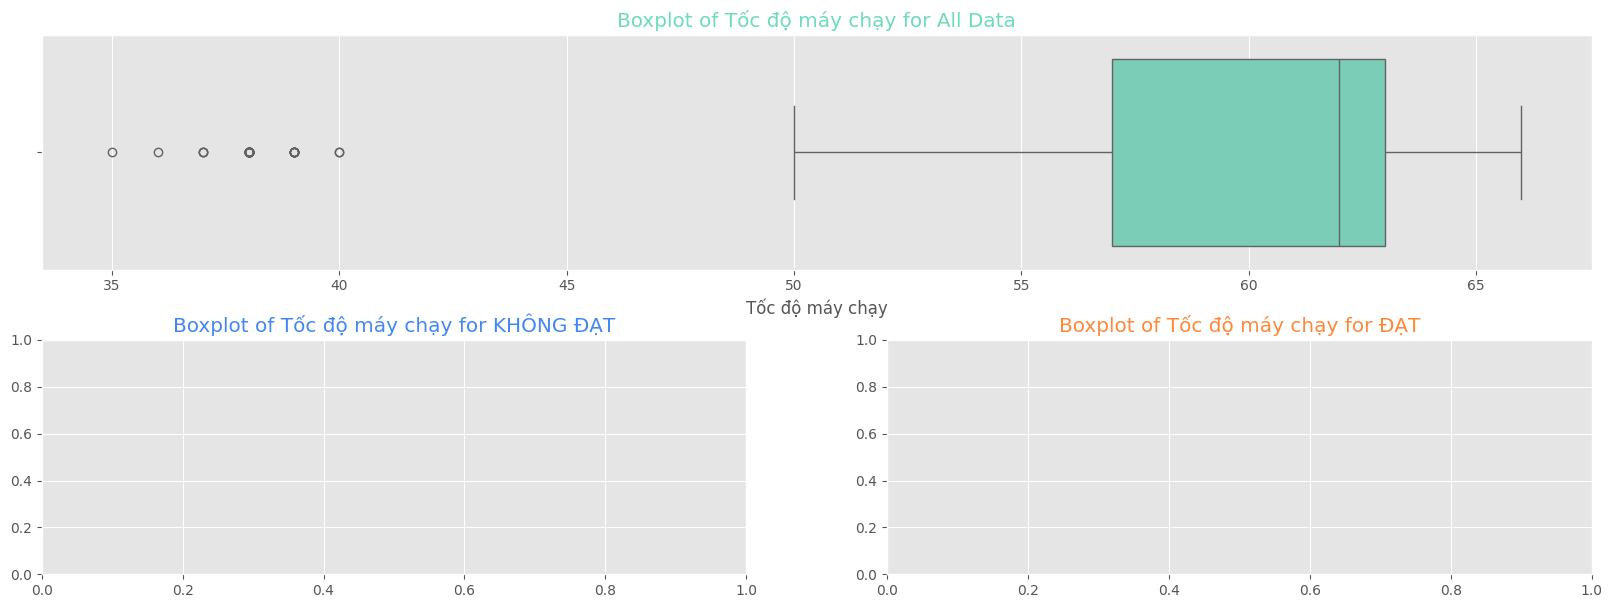

In [12]:
num_boxplot('Tốc độ máy chạy')

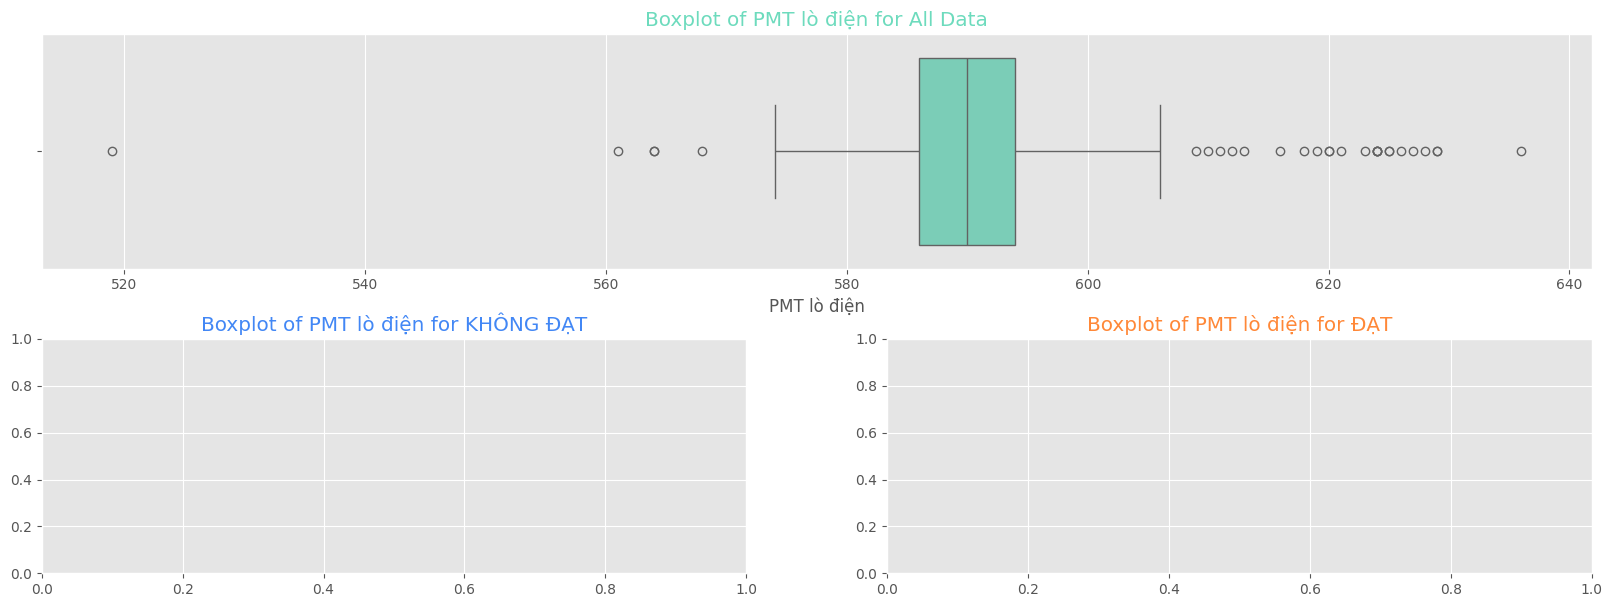

In [13]:
num_boxplot("PMT lò điện")

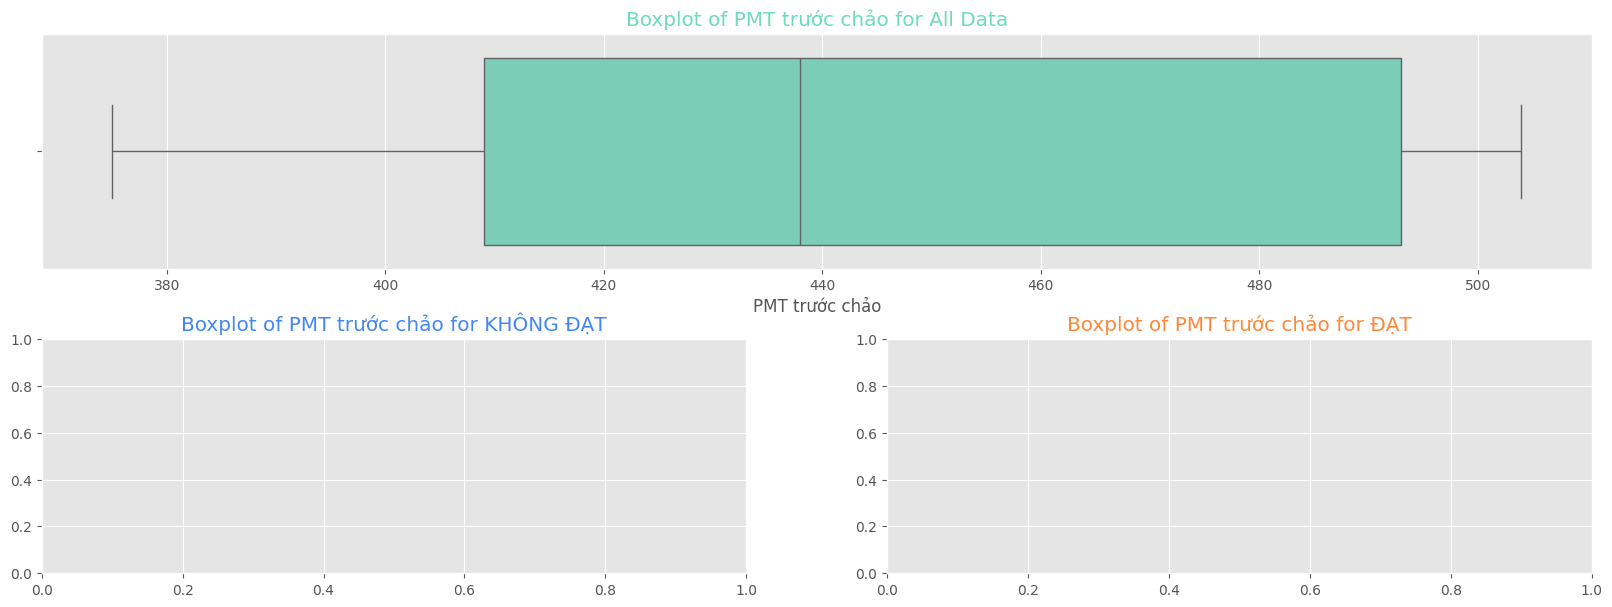

In [14]:
num_boxplot("PMT trước chảo")

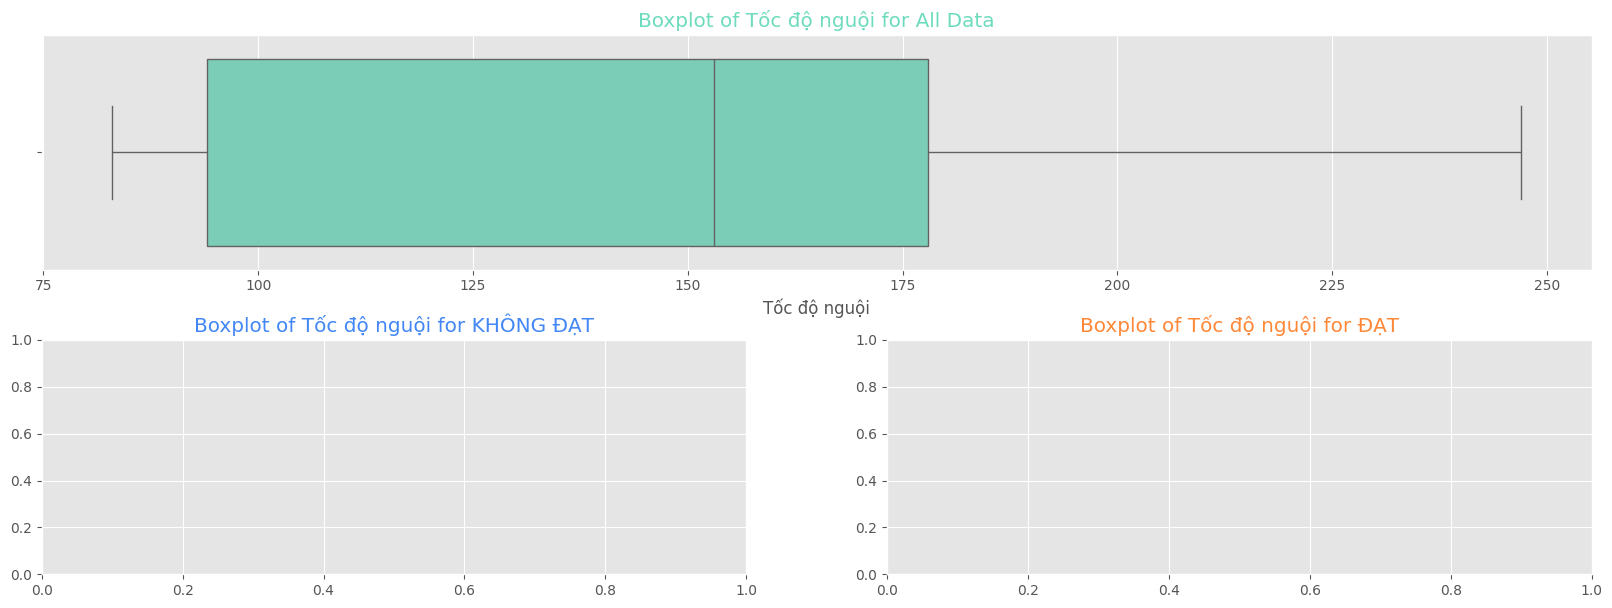

In [15]:
num_boxplot('Tốc độ nguội')

In [16]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name) -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(15, 5))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='coolwarm', annot=True)
    plt.title(title_name)
    plt.show()

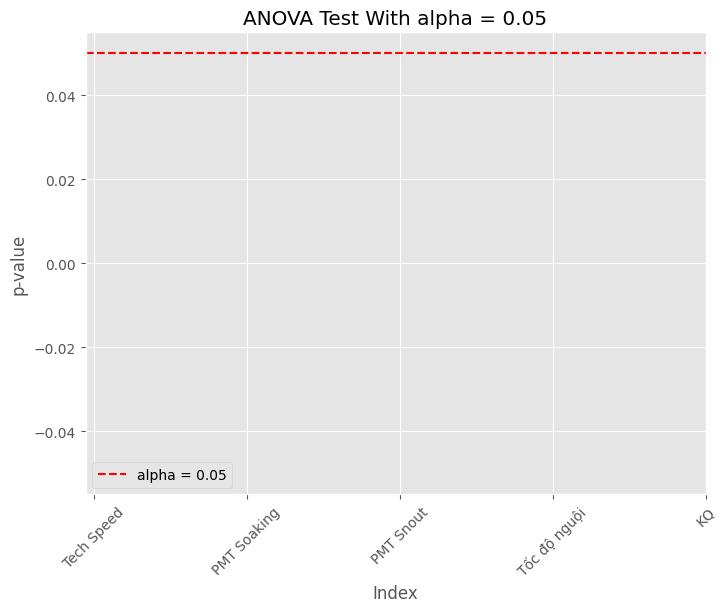

In [17]:
p_values = []
for col in df:
    if df[col].dtype != 'object':
        anova_result = stats.f_oneway(df[df['KQ'] == 0][col], df[df['KQ'] == 1][col])
        p_values.append(anova_result.pvalue)
    else:
        cat_plot = sns.catplot(x=col, y=numeric_col, hue='KQ', data=df, kind='box')
        cat_plot.set_titles(col)
        plt.show()

alpha = 0.05
plt.figure(figsize=(8, 6))
plt.bar(range(len(p_values)), p_values, color='skyblue')
plt.axhline(y=alpha, color='red', linestyle='--', label='alpha = 0.05')
plt.title('ANOVA Test With alpha = 0.05')
plt.xlabel('Index')
plt.ylabel('p-value')
plt.xticks(range(len(p_values)), number, rotation=45)
plt.legend()
plt.show()